<a href="https://colab.research.google.com/github/hmatny/image_classification/blob/master/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pprint
import numpy as np
import pandas as pd
from IPython.display import display as disp
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
# extract the images
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xvf cifar-10-python.tar.gz 

--2019-04-28 19:07:53--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz.1’

cifar-10-python.tar 100%[===================>] 162.60M  8.92MB/s    in 12s     

2019-04-28 19:08:06 (13.0 MB/s) - ‘cifar-10-python.tar.gz.1’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [0]:
def normalize(lst):
    s = sum(lst)
    return map(lambda x: float(x)/s, lst)


def get_train_data(numBatches):
    train_data = []
    train_labels = []
    file = "cifar-10-batches-py/data_batch_" + str(numBatches)
    batch_data_2 = unpickle(file)
    train_data = batch_data_2[b'data']
    train_labels = batch_data_2[b'labels']

    for i in range(1,numBatches):
        file = "cifar-10-batches-py/data_batch_" + str(i)
        batch_data = unpickle(file)
        data = batch_data[b'data']
        labels = batch_data[b'labels']
        
        train_data = np.concatenate((train_data, data),0)
        train_labels= np.concatenate((train_labels, labels),0)
        
    return train_data, train_labels

def get_test_data():
    file = "cifar-10-batches-py/test_batch"
    test_batch = unpickle(file)
    test_data = test_batch[b'data']
    test_labels = test_batch[b'labels']
    
    return test_data, test_labels




In [0]:
# retrieve train_data, train_labels
train_data, train_labels = get_train_data(5)
test_data, test_labels = get_test_data()

train_labels = train_labels
train_data = train_data

test_labels = test_labels
test_data = test_data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data = train_data.astype("float")
# Fit on training set only.
scaler.fit(train_data)
# Apply transform to both the training set and the test set.
train_data = scaler.transform(train_data)
test_data = test_data.astype("float")
test_data = scaler.transform(test_data)

from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)
pca.fit(train_data)
train_data = pca.transform(train_data)
test_data = pca.transform(test_data)
# # normalize data
# norm_data = []
# for i in test_data:
#     norm_data.append(i/max(i))
    
# test_data = norm_data

# norm_data = []
# for i in train_data:
#     norm_data.append(i/max(i))
# train_data = norm_data




In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

def fit_knn(train_data, train_labels, k):
    knn = KNeighborsClassifier(k)
    knn.fit(train_data,train_labels) #fit data in classifier
    return knn

#retrieve knn model with specified number of k
knn = fit_knn(train_data[:30000], train_labels[:30000], 10)

In [0]:
import time
knn_data = test_data
knn_labels = test_labels
t = time.time()
pred_labels = knn.predict(knn_data)
knn_time = time.time()-t


# ** KNN with K=10:**

Time Taken: 105.45431709289551
Accuracy: 0.3478


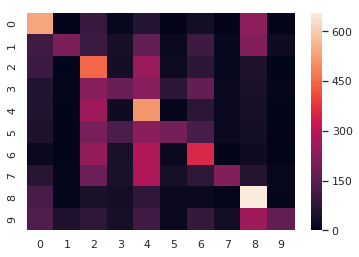

In [105]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

conf = confusion_matrix(knn_labels, pred_labels)
print("Time Taken: " + str(knn_time))
print("Accuracy: " + str(accuracy_score(knn_labels, pred_labels)))

# Plot non-normalized confusion matrix
conf_matrix = sns.heatmap(conf)

# **KNN Cross Validation**

fitting cross val model
K used:12
creating model with best_K
predicting
Time Taken: 1416.6873371601105
Accuracy: 0.362


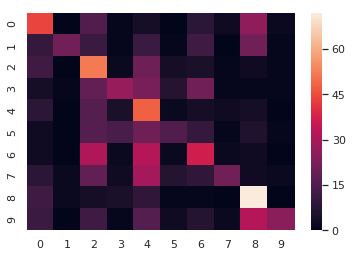

In [25]:
## CROSS VALIDATION
from sklearn.model_selection import GridSearchCV
def cross_val(a,b):
    #create new a knn model
    knn2 = KNeighborsClassifier()
    #create a dictionary of all values we want to test for n_neighbors 
    param_grid = {'n_neighbors': np.arange(a,b)}
    #use gridsearch to test all values for n_neighbors
    knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
    #fit model to data
    print("fitting cross val model")
    knn_gscv.fit(train_data[:10000],train_labels[:10000])
    #check top performing n_neighbors value
    k = knn_gscv.best_params_['n_neighbors']
    
    return k

t = time.time()
best_k = cross_val(5,15)
print("K used:" + str(best_k))
# create the knn model with K retrieved from cross validation
knn = fit_knn(train_data, train_labels, best_k)
print("creating model with best_K")
knn_data = test_data[:1000]
knn_labels = test_labels[:1000]
pred_labels = knn.predict(knn_data)
print("predicting")
knn_time = time.time()-t

conf = confusion_matrix(knn_labels, pred_labels)
print("Time Taken: " + str(knn_time))
print("Accuracy: " + str(accuracy_score(knn_labels, pred_labels)))

# Plot non-normalized confusion matrix
conf_matrix = sns.heatmap(conf)

# SVM

In [0]:
# changes the labels to apply binary classification (1 vs 0)

def binary_labels(labels, target):
    return [1 if label == target else 0 for label in labels]

In [0]:
#svm
# from sklearn.svm import SVC
from sklearn.svm import LinearSVC

def predict_svm(train,test):
    train_data,train_labels = train
    test_data,test_labels = test
    # 10 svms to predict each class 1vsALL
    svms = [LinearSVC(C=4e-2) for i in range(10)]
    # fit 10 models
    svms = [svms[i].fit(train_data,binary_labels(train_labels,i)) for i in range(10)]
    # should return list of lists, where predictions[5] = labels predicted for class 5 ...
    print("Now predicting!")
    preds = [svms[i].predict(test_data) for i in range(10)]
    return preds

def svm_acc(preds, test_labels):
    acc = 0
    for i in range(len(test_labels)):
        label = test_labels[i]
        svm_label = preds[label]
        if svm_label[i] == 1:
            acc += 1
    return acc/len(test_labels)

def convert_predictions(preds):
    tot_preds = list(range(len(preds[0])))
    for i in range(len(preds)):
        pred = preds[i]
        for j in range(len(pred)):
            if pred[j] == 1:
                tot_preds[j] = i
    return tot_preds

In [0]:
# #grab data
# train_data, train_labels = get_train_data(5)
# test_data, test_labels = get_test_data()
# #slice labels

svm_train_labels = train_labels
svm_train_data = train_data

svm_test_labels = test_labels
svm_test_data = test_data
# #convert binary labels

In [109]:
import time
start = time.time()
preds = predict_svm((svm_train_data[:30000],svm_train_labels[:30000]),(svm_test_data,svm_test_labels))
print("time: " + str(time.time()-start))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Now predicting!
time: 379.6524224281311


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy: 0.157
              precision    recall  f1-score   support

           0       0.14      0.14      0.14      1000
           1       0.19      0.20      0.20      1000
           2       0.12      0.10      0.11      1000
           3       0.11      0.10      0.11      1000
           4       0.12      0.11      0.12      1000
           5       0.12      0.11      0.12      1000
           6       0.15      0.15      0.15      1000
           7       0.19      0.20      0.19      1000
           8       0.20      0.24      0.22      1000
           9       0.19      0.21      0.20      1000

   micro avg       0.16      0.16      0.16     10000
   macro avg       0.15      0.16      0.16     10000
weighted avg       0.15      0.16      0.16     10000



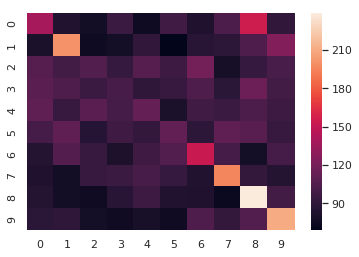

In [110]:
import random

svm_preds = convert_predictions(preds)
svm_preds =  [random.randint(0,9) if p > 9 else p for p in svm_preds]

from sklearn.metrics import classification_report, confusion_matrix

print("Accuracy: " + str(accuracy_score(svm_test_labels, svm_preds)))
conf = confusion_matrix(svm_test_labels, svm_preds)
print(classification_report(svm_test_labels,svm_preds))
conf_matrix = sns.heatmap(conf)


ValueError: ignored

In [99]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

clf = LinearSVC(C=4e-4)
scores = cross_val_score(clf, train_data, train_labels, cv=5)
print(scores)



[0.401  0.4107 0.3968 0.4091 0.4032]


221


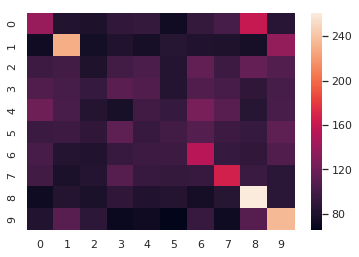

In [108]:
import seaborn as sns; sns.set()

conf_mat = sns.heatmap(conf)
print(len(train_data[0]))